# **Comparing K-Means and Mini-Batch K-Means**



# Importing necessary libraries

In [35]:
from __future__ import print_function
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
plt.style.use("ggplot")
import skimage
from skimage import io
from sklearn.cluster import KMeans

from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider
import ipywidgets as widgets

# Reading, visualising and Pre processing Image Data

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
plt.rcParams['figure.figsize'] = (20, 12)

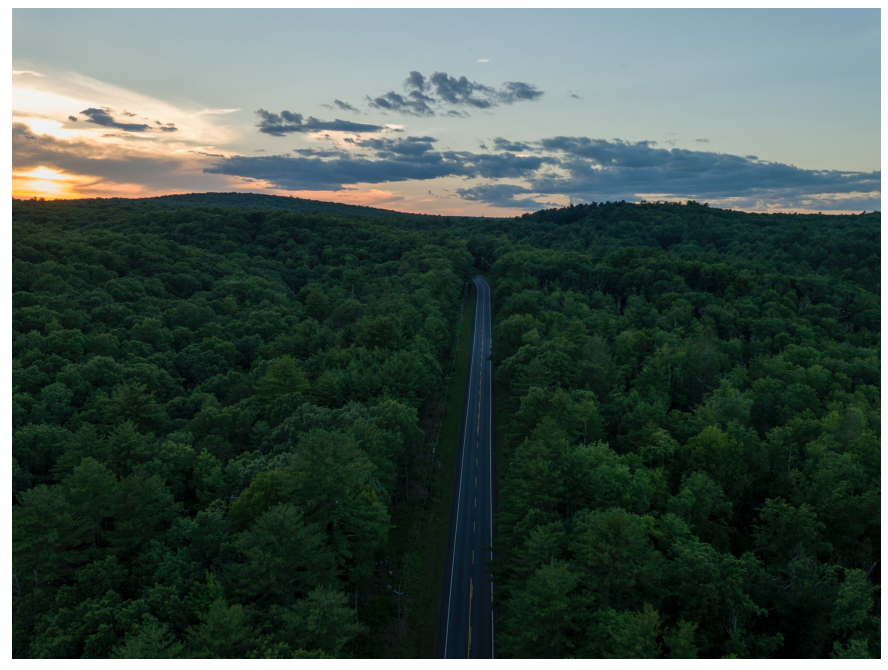

In [38]:
image = io.imread('/content/drive/MyDrive/Images/Forests.jpg')
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(image);

In [39]:
image.shape

(2249, 3000, 3)

In [40]:
img_data = (image / 255.0).reshape(-1, 3)
img_data.shape

(6747000, 3)

In [41]:
import numpy as np
import matplotlib.pyplot as plt

class plot_utils:
    def __init__(self, img_data, title, num_pixels=10000, colors=None):
        self.img_data = img_data
        self.title = title
        self.num_pixels = num_pixels
        self.colors = colors

    def colorSpace(self):
        if self.colors is None:
            self.colors = self.img_data

        rand = np.random.RandomState(42)
        index = rand.permutation(self.img_data.shape[0])[:self.num_pixels]
        colors = self.colors[index]
        R, G, B = self.img_data[index].T
        fig, ax = plt.subplots(1, 2, figsize=(12,8))
        ax[0].scatter(R, G, color=colors, marker='.')
        ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))
        ax[1].scatter(R, B, color=colors, marker='.')
        ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))
        fig.suptitle(self.title, size=20)

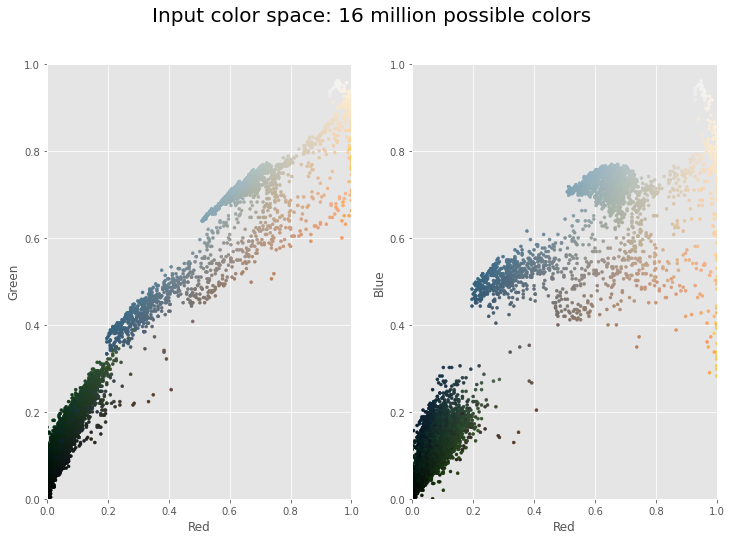

In [42]:
x = plot_utils(img_data, title='Input color space: 16 million possible colors')
x.colorSpace()

In [ ]:
image_compressed = io.imread('tiger_small.jpg')
io.imshow(image_compressed)
io.show()

# Mini Batch K Means

In [43]:
from sklearn.cluster import MiniBatchKMeans

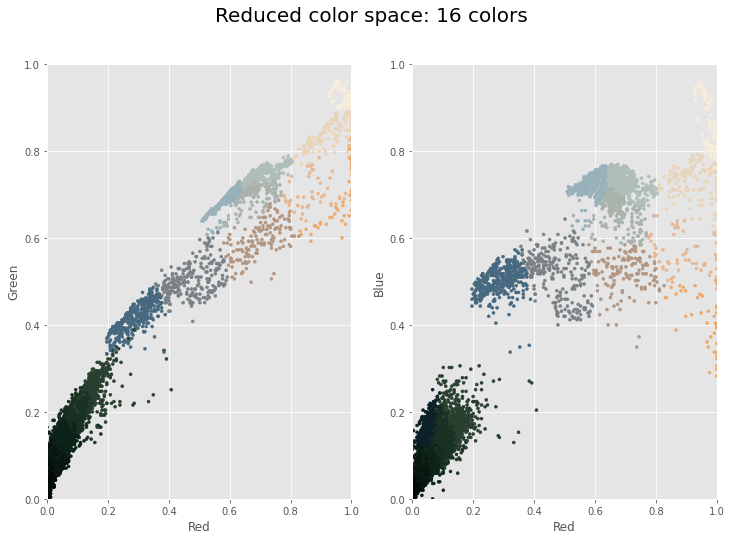

In [44]:
kmeans = MiniBatchKMeans(16).fit(img_data)
k_colors = kmeans.cluster_centers_[kmeans.predict(img_data)]

y = plot_utils(img_data, colors=k_colors, title="Reduced color space: 16 colors")
y.colorSpace()

In [45]:
k_img = np.reshape(k_colors, (image.shape))

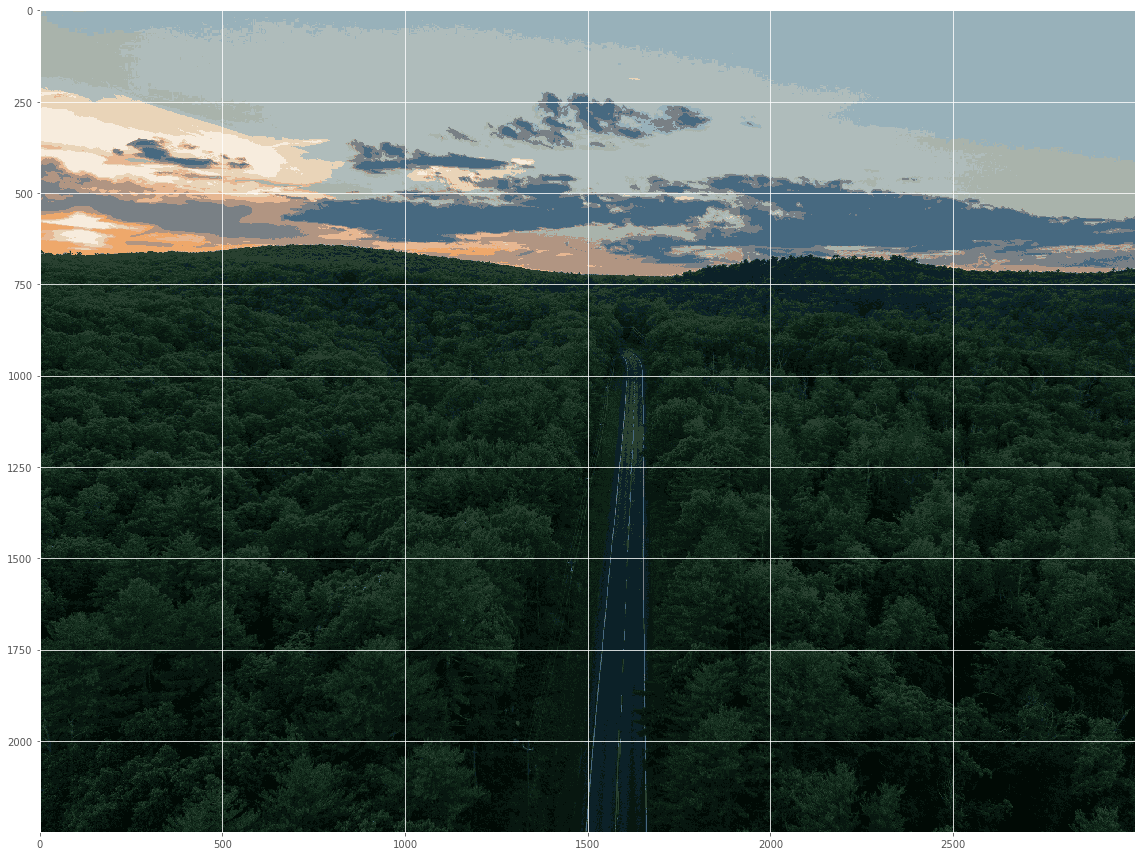

In [59]:
io.imshow(k_img);

In [60]:
import imageio
imageio.imwrite('forest_mbkmeans.jpg', k_img)

In [48]:
import os
info = os.stat('/content/drive/MyDrive/Images/victor-charlie-uUFVmiNdt14-unsplash.jpg')
print("size of image before running K-mean algorithm: ",info.st_size/1024,"KB")
info1 = os.stat('forest_mbkmeans.jpg')
print("size of image after running K-mean algorithm: ",info1.st_size/1024,"KB")
print("Percentage reduction in size: ",100 - (info1.st_size/info.st_size)*100 )

size of image before running K-mean algorithm:  1613.423828125 KB
size of image after running K-mean algorithm:  746.0234375 KB
Percentage reduction in size:  53.761471443807025


# KMeans

In [49]:
rows, cols = image.shape[0], image.shape[1]
image = image.reshape(rows * cols, 3)

In [50]:
print(image.shape)
print(image[:5])

(6747000, 3)
[[165 181 181]
 [165 181 181]
 [165 181 181]
 [165 181 181]
 [165 181 181]]


In [51]:
# modelling
kMeans = KMeans(n_clusters = 16)
kMeans.fit(image)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=16, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [52]:
# centers
centers = np.asarray(kMeans.cluster_centers_, dtype = np.uint8)
centers

array([[  9,  24,  17],
       [163, 183, 188],
       [ 97, 119, 134],
       [ 19,  43,  46],
       [234, 211, 181],
       [ 14,  36,  25],
       [ 67, 102, 125],
       [247, 235, 218],
       [238, 177, 121],
       [136, 133, 129],
       [ 39,  64,  46],
       [  2,  12,   7],
       [185, 160, 138],
       [179, 189, 182],
       [ 25,  50,  31],
       [145, 171, 181]], dtype=uint8)

In [53]:
# labels 
labels = np.asarray(kMeans.labels_, dtype = np.uint8)
print(labels.shape)
labels = np.reshape(labels, (rows, cols))
print(labels.shape)
labels

(6747000,)
(2249, 3000)


array([[ 1,  1,  1, ..., 15, 15, 15],
       [ 1,  1,  1, ..., 15, 15, 15],
       [ 1,  1,  1, ..., 15, 15, 15],
       ...,
       [11, 11, 11, ...,  0,  0,  0],
       [11, 11, 11, ...,  0,  0,  0],
       [ 0, 11, 11, ..., 14,  0,  0]], dtype=uint8)

In [54]:
# reconstructing
newImage = np.zeros((rows, cols, 3), dtype = np.uint8)
for i in range(rows):
    for j in range(cols):
            # assinging every pixel the rgb color of their label's center 
            newImage[i, j, :] = centers[labels[i, j], :]
io.imsave('dog-compressed.png', newImage);

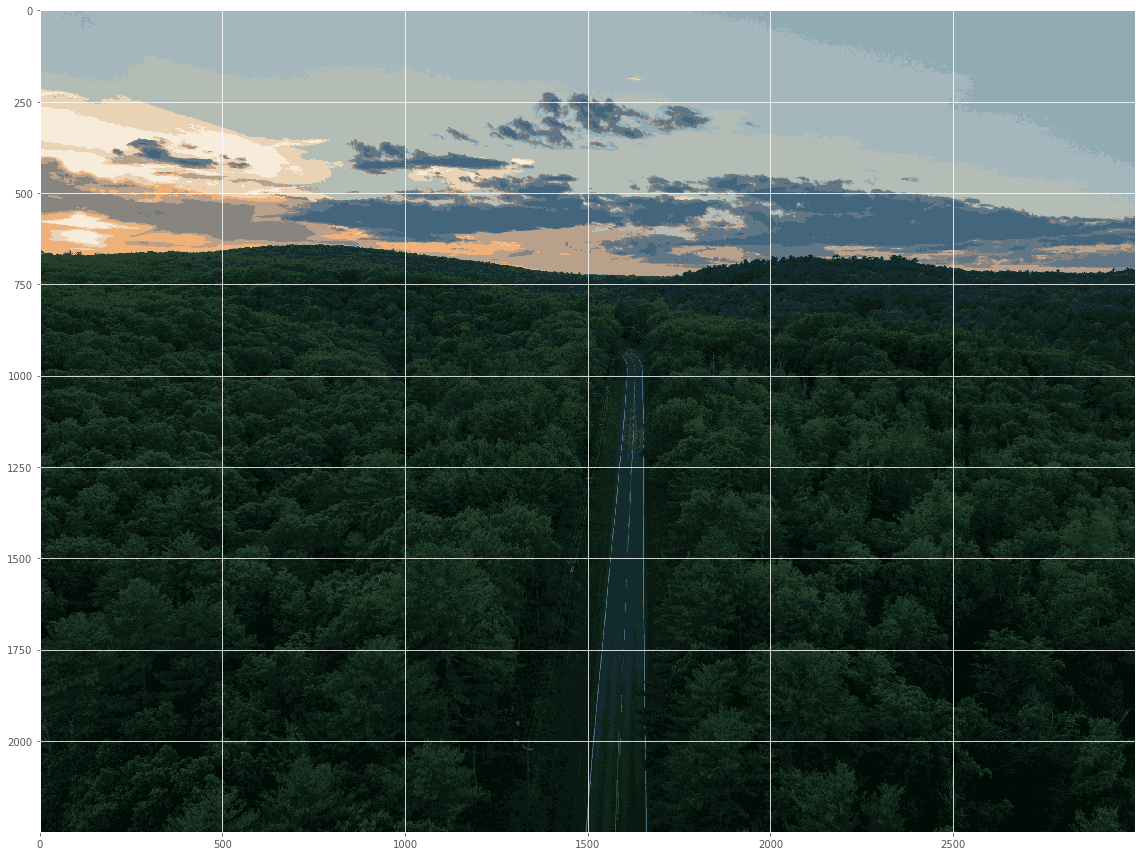

In [55]:
io.imshow(newImage);

In [56]:
import os
info = os.stat('/content/drive/MyDrive/Images/victor-charlie-uUFVmiNdt14-unsplash.jpg')
print("size of image before running K-mean algorithm: ",info.st_size/1024,"KB")
info1 = os.stat('dog-compressed.png')
print("size of image after running K-mean algorithm: ",info1.st_size/1024,"KB")
print("Percentage reduction in size: ",100 - (info1.st_size/info.st_size)*100 )

size of image before running K-mean algorithm:  1613.423828125 KB
size of image after running K-mean algorithm:  1574.78515625 KB
Percentage reduction in size:  2.3948246704589025


# Observations



*   Mini Batch KMeans is more effective than KMeans 
*   K means Takes more time than Mini Batch KMeans

